# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import style
%matplotlib inline

# Reading data

In [2]:
dataset = pd.read_csv('../Datasets/gold_price_data.csv')

In [3]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#SPX = Capilatization index of companies that is the stock value
#USO = United States Oil Price
#SLV = Silver Price Value
#EUR/USD = Currency pair

In [5]:
dataset.shape

(2290, 6)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
dataset.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# EDA and Data Visualization

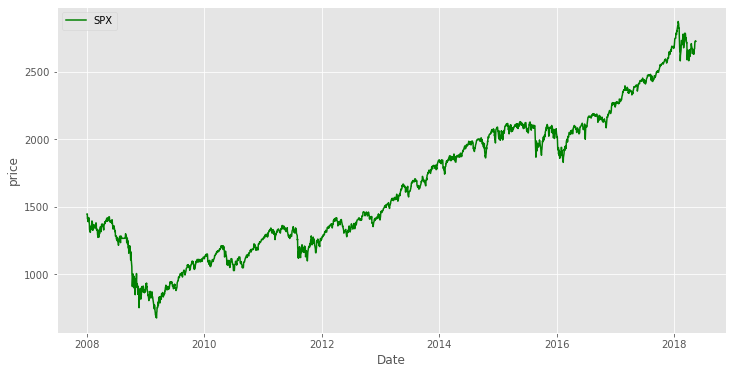

In [9]:
style.use('ggplot')
data_set1 = dataset.copy()
data_set1.Date = pd.to_datetime(data_set1['Date'])
data_set1.set_index('Date')
plt.figure(figsize=(12,6))
plt.plot(data_set1['Date'].values,data_set1['SPX'],color='green',label='SPX')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

Text(0.5, 1.05, 'Correlation of dataset Features')

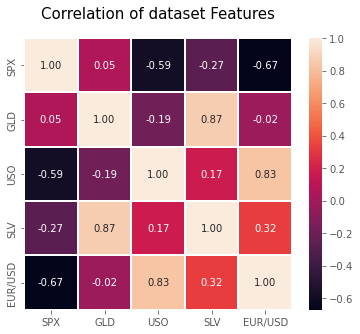

In [10]:
#Lets see the correlation matrix and heatmap
corr = dataset.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of dataset Features', y = 1.05, size=15)

In [11]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


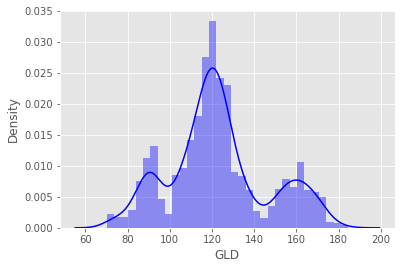

In [12]:
#Lets Check our target variable

sns.distplot(dataset['GLD'], color = 'blue')
print('Skewness: %f', dataset['GLD'].skew())
print("Kurtosis: %f" % dataset['GLD'].kurt())

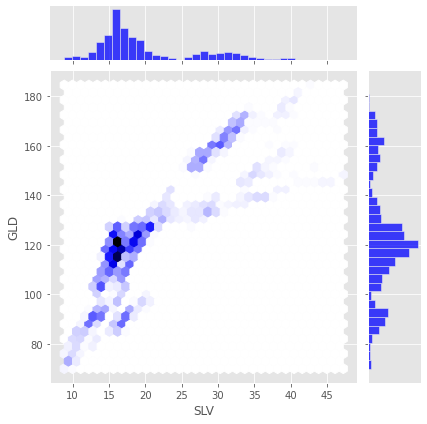

In [13]:
#Now we check the relation with GLD variable
sns.jointplot(x = dataset['SLV'], y = dataset['GLD'], color = 'blue', kind = 'hex')

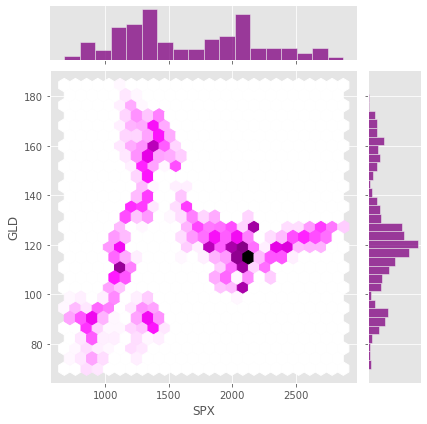

In [14]:
sns.jointplot(x = dataset['SPX'], y = dataset['GLD'], color = 'purple', kind = 'hex')

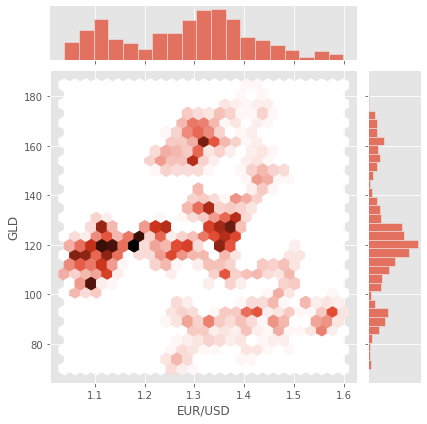

In [15]:
sns.jointplot(x='EUR/USD',y='GLD',kind='hex',data=dataset)

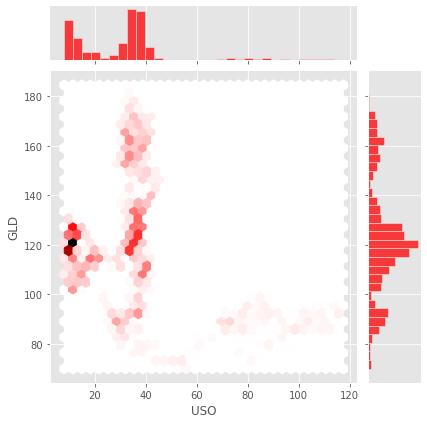

In [16]:
sns.jointplot(x='USO',y='GLD',kind='hex',data=dataset, color='red')

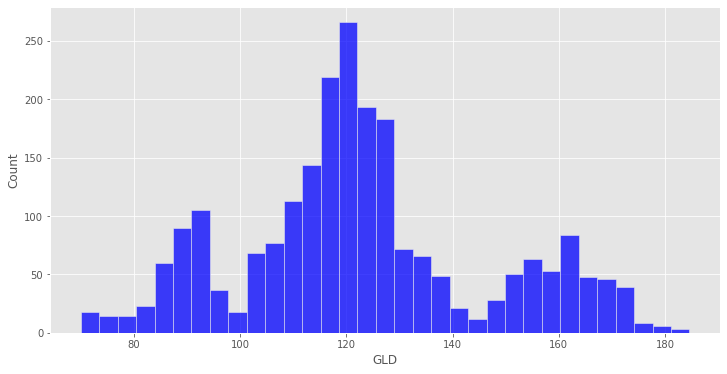

In [17]:
style.use('ggplot')
plt.figure(figsize=(12,6))
sns.histplot(dataset['GLD'],color='Blue')
#plt.xlabel('Date')
plt.show()

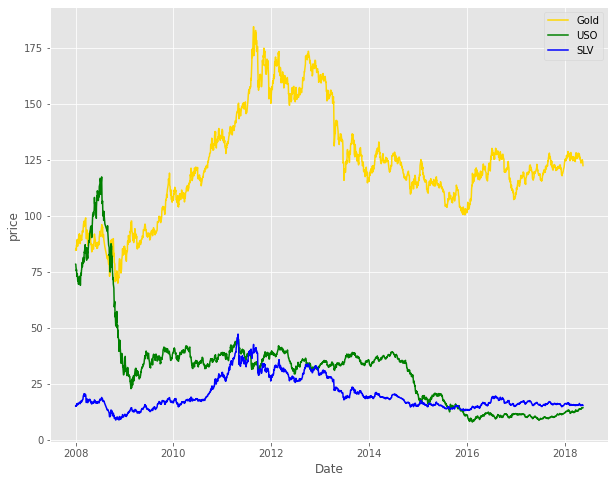

In [18]:
style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(data_set1['Date'].values,data_set1['GLD'],color='gold',label='Gold')
plt.plot(data_set1['Date'].values,data_set1['USO'],color='green',label='USO')
plt.plot(data_set1['Date'].values,data_set1['SLV'],color='Blue',label='SLV')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

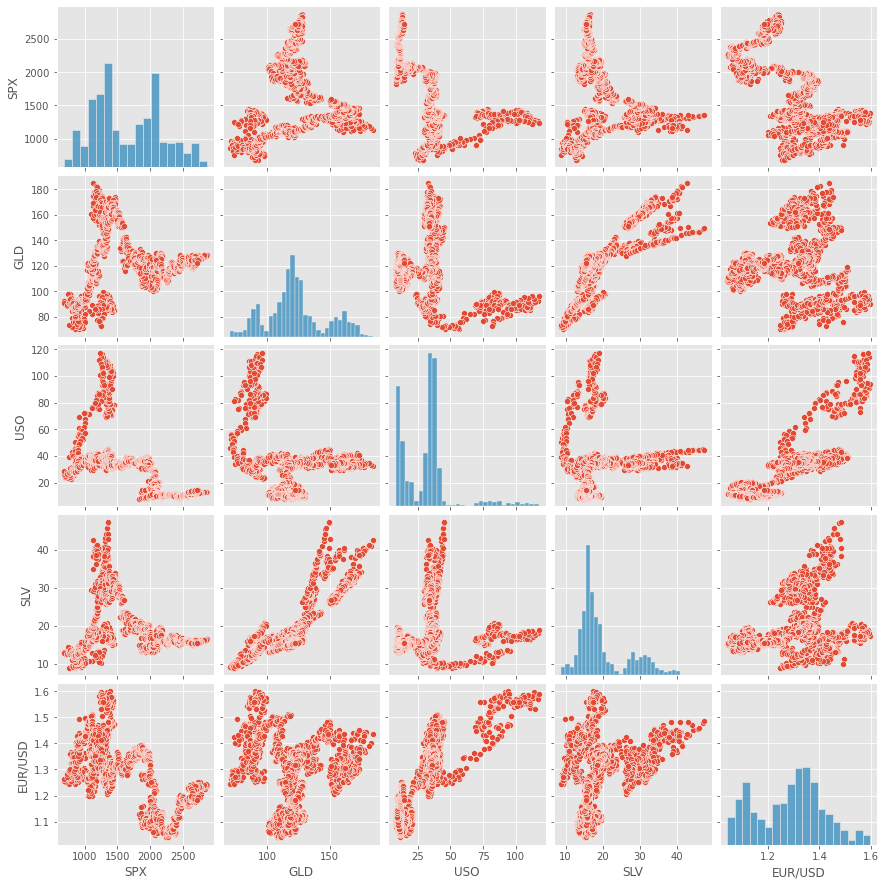

In [19]:
style.use('ggplot')
sns.pairplot(dataset)

# Data splitting

In [20]:
X = dataset.drop(['Date','GLD'],axis=1)
Y = dataset['GLD']

In [21]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [22]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
Accuracy=[]
Algorithm = []

# Model Building

## 1. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predicted = lin_reg.predict(x_test)

In [26]:
Accuracy.append(lin_reg.score(x_test,y_test))
print(lin_reg.score(x_test,y_test))

0.8975640982991402


In [27]:
for i in Algorithm, Accuracy:
    print(i,end=',')

['LinearRegression'],[0.8975640982991402],

## 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegresor')
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predicted_tree = dtr.predict(x_test)

In [29]:
Accuracy.append(dtr.score(x_test,y_test))
print(dtr.score(x_test,y_test))

0.9832652886268661


## 3. Random Forest 

In [30]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegressor')
rfr = RandomForestRegressor(n_estimators = 100, random_state=0)
rfr.fit(x_train, y_train)
predicted_forest = rfr.predict(x_test)

In [31]:
Accuracy.append(rfr.score(x_test,y_test))
print(rfr.score(x_test,y_test))

0.9892674649325068


# 4. SVM

In [32]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
svr = SVR()
svr.fit(x_train, y_train)
predicted_svr = svr.predict(x_test)

In [33]:
Accuracy.append(svr.score(x_test,y_test))
print(svr.score(x_test,y_test))

0.13154484322439075


In [34]:
df = pd.DataFrame({'Algorithm': Algorithm,'Accuracy':Accuracy}) 
df

,Algorithm,Accuracy
0,LinearRegression,0.897564
1,DecisionTreeRegresor,0.983265
2,RandomForestRegressor,0.989267
3,SupportVectorRegression,0.131545


In [ ]:
import pickle
model = rfr
pickle.dump(model,open("../Models/GoldPricePrediction.pkl",'wb'))